In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns
import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# path to the uploaded train ZIP file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/train.zip'

# directory to extract to
extract_to = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_to)

extracted_folder_path = os.path.join(extract_to, 'foldername')
print("Files extracted to:", extracted_folder_path)

# path to the uploaded test ZIP file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/test.zip'

# directory to extract to
extract_to = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_to)

extracted_folder_path = os.path.join(extract_to, 'foldername')
print("Files extracted to:", extracted_folder_path)

Files extracted to: /content/foldername
Files extracted to: /content/foldername


In [ ]:
import zipfile
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# path to the uploaded train ZIP file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/train.zip'

# directory to extract to
extract_to = '/content/'

# Check if the zip file exists before trying to extract it
if os.path.exists(zip_file_path):
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

  extracted_folder_path = os.path.join(extract_to, 'foldername')  # Replace 'foldername' with the actual folder name if different
  print("Files extracted to:", extracted_folder_path)
else:
  print(f"Error: Zip file not found at {zip_file_path}")

# Similar process for test.zip
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/test.zip'
if os.path.exists(zip_file_path):
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

  extracted_folder_path = os.path.join(extract_to, 'foldername')  # Replace 'foldername' with the actual folder name if different
  print("Files extracted to:", extracted_folder_path)
else:
  print(f"Error: Zip file not found at {zip_file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files extracted to: /content/foldername
Files extracted to: /content/foldername


In [ ]:
import pathlib

IMAGE_SHAPE = (224, 224)
batch_size = 32


trainDataset_url = "/content/train"
data_dir = pathlib.Path(trainDataset_url)


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SHAPE,  # Resize all images to (224, 224)
    batch_size=batch_size,
    shuffle=True
)

for image_batch, label_batch in train_dataset.take(1):
    print(image_batch.shape)  # Should output: (batch_size, 224, 224, 3)
    print(label_batch.shape)

testDataset_url = "/content/test"
test_dir = pathlib.Path(testDataset_url)

print(data_dir)

Found 1156 files belonging to 9 classes.
(32, 224, 224, 3)
(32,)
/content/train


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

image_count = len(list(test_dir.glob('*/*.jpg')))
print(image_count)

1156
502


In [ ]:
Ajwa_tr = list(data_dir.glob('Ajwa/*'))
Ajwa_test = list(test_dir.glob('Ajwa/*'))


Galaxy_tr = list(data_dir.glob('Galaxy/*'))
Galaxy_test = list(test_dir.glob('Galaxy/*'))


Mejdool_tr = list(data_dir.glob('Mejdool/*'))
Mejdool_test = list(test_dir.glob('Mejdool/*'))


Meneifi_tr = list(data_dir.glob('Meneifi/*'))
Meneifi_test = list(test_dir.glob('Meneifi/*'))


NabatAli_tr = list(data_dir.glob('NabtatAli/*'))
NabatAli_test = list(test_dir.glob('NabtatAli/*'))


Ruteb_tr = list(data_dir.glob('Rutab/*'))
Ruteb_test = list(test_dir.glob('Rutab/*'))


Shaishe_tr = list(data_dir.glob('Shaishe/*'))
Shaishe_test = list(test_dir.glob('Shaishe/*'))


Sokari_tr = list(data_dir.glob('Sokari/*'))
Sokari_test = list(test_dir.glob('Sokari/*'))


Sugaey_tr = list(data_dir.glob('Sugaey/*'))
Sugaey_test = list(test_dir.glob('Sugaey/*'))


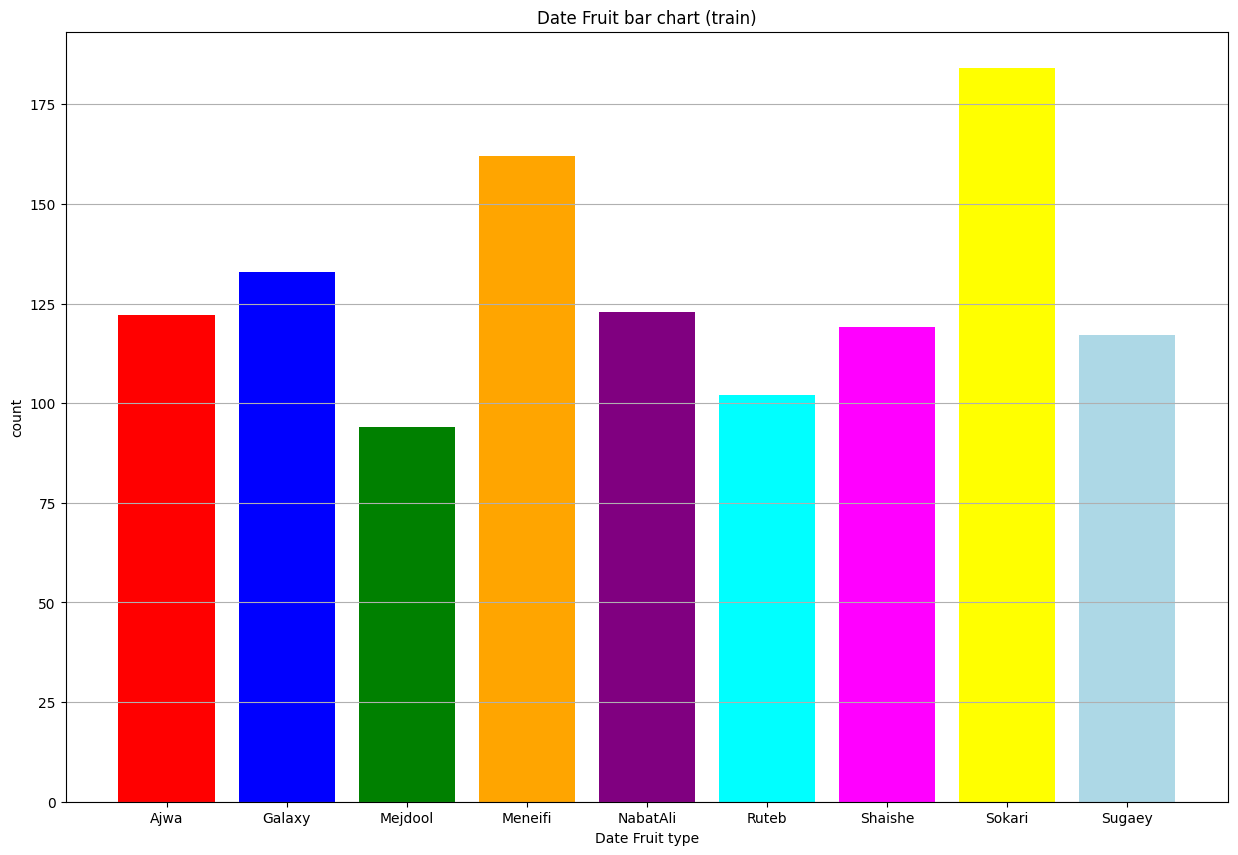

In [ ]:
Labels = ["Ajwa","Galaxy","Mejdool","Meneifi","NabatAli","Ruteb","Shaishe","Sokari","Sugaey"]
count = []

count.append(len(Ajwa_tr))
count.append(len(Galaxy_tr))
count.append(len(Mejdool_tr))
count.append(len(Meneifi_tr))
count.append(len(NabatAli_tr))
count.append(len(Ruteb_tr))
count.append(len(Shaishe_tr))
count.append(len(Sokari_tr))
count.append(len(Sugaey_tr))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lightblue']


plt.figure(figsize=(15, 10))
plt.bar(Labels, count, color = colors)

plt.xlabel('Date Fruit type')
plt.ylabel('count')
plt.title('Date Fruit bar chart (train)')
plt.grid(axis='y')

plt.show()

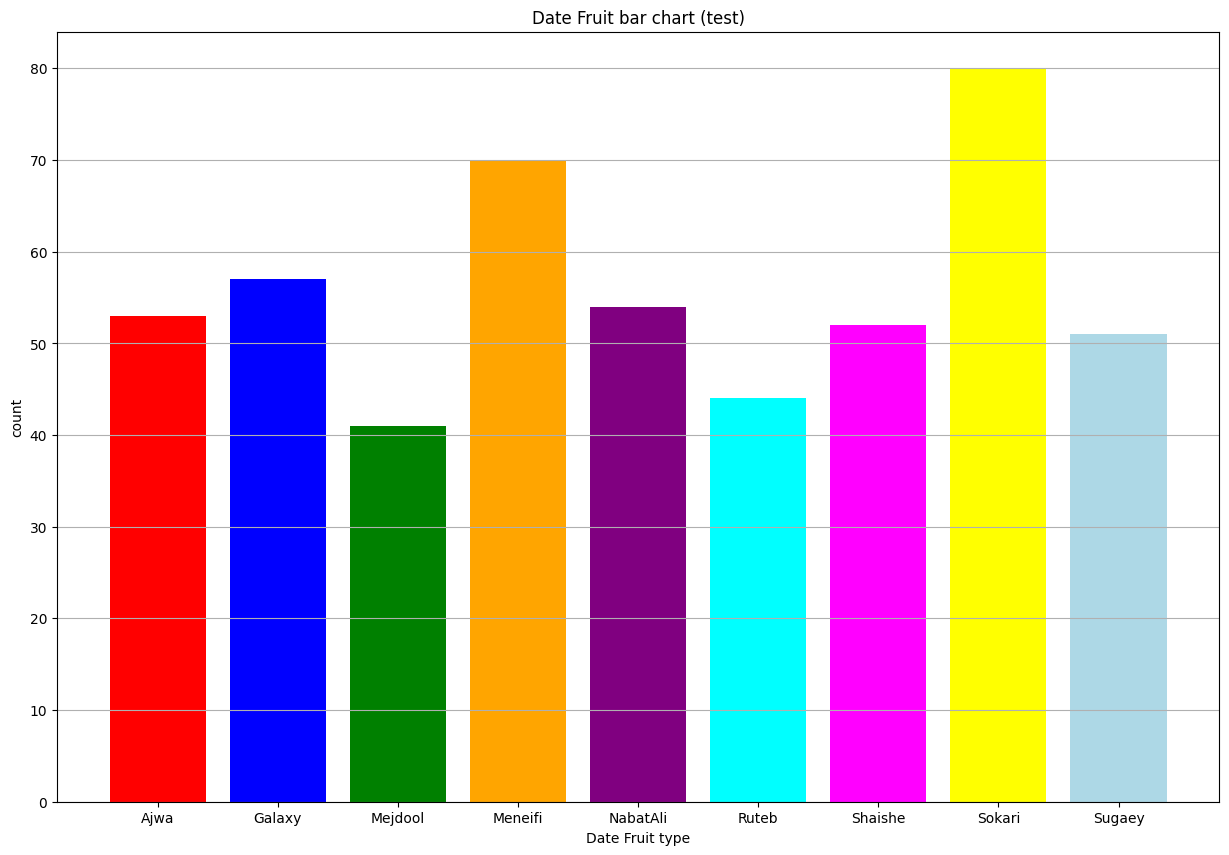

In [ ]:
count = []

count.append(len(Ajwa_test))
count.append(len(Galaxy_test))
count.append(len(Mejdool_test))
count.append(len(Meneifi_test))
count.append(len(NabatAli_test))
count.append(len(Ruteb_test))
count.append(len(Shaishe_test))
count.append(len(Sokari_test))
count.append(len(Sugaey_test))


plt.figure(figsize=(15, 10))
plt.bar(Labels, count, color = colors)

plt.xlabel('Date Fruit type')
plt.ylabel('count')
plt.title('Date Fruit bar chart (test)')
plt.grid(axis='y')
plt.show()

In [ ]:
img_height = 224
img_width = 224

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 1156 files belonging to 9 classes.
Using 925 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 1156 files belonging to 9 classes.
Using 231 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 502 files belonging to 9 classes.


In [ ]:
class_names = np.array(train_ds.class_names)
print(class_names)


['Ajwa' 'Galaxy' 'Mejdool' 'Meneifi' 'NabtatAli' 'Rutab' 'Shaishe'
 'Sokari' 'Sugaey']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = mobilenet_v2

In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(img_height, img_width, 3),
    trainable=False)

In [ ]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


In [ ]:
num_classes = len(class_names)

class HubKerasLayerWrapper(tf.keras.layers.Layer):
    def __init__(self, hub_layer):
        super(HubKerasLayerWrapper, self).__init__()
        self.hub_layer = hub_layer

    def call(self, inputs):
        return self.hub_layer(inputs)

wrapped_feature_extractor_layer = HubKerasLayerWrapper(feature_extractor_layer)


In [ ]:
model = tf.keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  wrapped_feature_extractor_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation = "softmax")
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_keras_layer_wrapper_3            │ (None, 1280)                │               0 │
│ (HubKerasLayerWrapper)               │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,601 (682.04 KB)

 Trainable params: 174,601 (682.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1)

In [ ]:
NUM_EPOCHS = 11
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/11


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/tensorboard.py:680: UserWarning: Model failed to serialize as JSON. Ignoring... 
Object HubKerasLayerWrapper was created by passing
non-serializable argument values in `__init__()`,
and therefore the object must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sof

29/29 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.3464 - loss: 1.9130 - val_accuracy: 0.6797 - val_loss: 0.9844
Epoch 2/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.7609 - loss: 0.7897 - val_accuracy: 0.8485 - val_loss: 0.5059
Epoch 3/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8628 - loss: 0.4456 - val_accuracy: 0.8615 - val_loss: 0.4012
Epoch 4/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9119 - loss: 0.3163 - val_accuracy: 0.8701 - val_loss: 0.3834
Epoch 5/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9025 - loss: 0.3130 - val_accuracy: 0.9177 - val_loss: 0.3037
Epoch 6/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9298 - loss: 0.1871 - val_accuracy: 0.9134 - val_loss: 0.2652
Epoch 7/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9514 - loss: 0.1614 - val_accuracy: 0.9004 - val_loss: 0.3375
Epoch 8/11
29/29 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9425 - loss: 0.1698 - val_accuracy: 0.8831 - val_loss: 0.3641
Epo

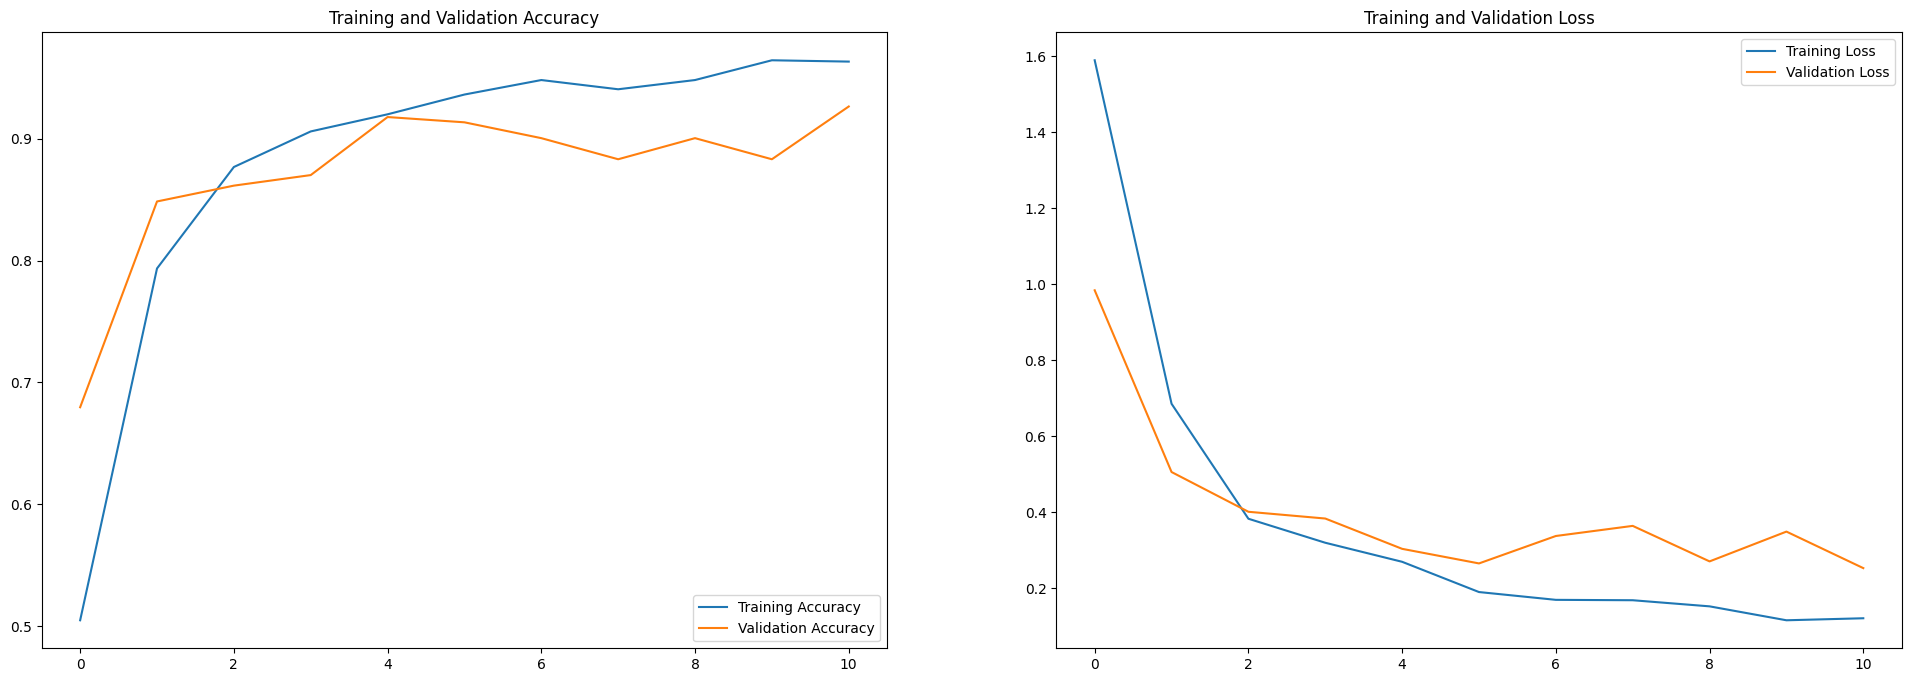

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

# accuracy
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9250 - loss: 0.2021
Test Loss: 0.22244493663311005
Test Accuracy: 0.9282868504524231


In [ ]:
y_true = []
y_pred = []

for images, labels in test_ds:

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
# classification report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.95      0.95        57
           2       1.00      0.98      0.99        41
           3       0.90      0.81      0.86        70
           4       0.95      0.96      0.95        54
           5       0.92      0.82      0.87        44
           6       0.92      0.92      0.92        52
           7       0.85      0.97      0.91        80
           8       0.94      0.94      0.94        51

    accuracy                           0.93       502
   macro avg       0.94      0.93      0.93       502
weighted avg       0.93      0.93      0.93       502



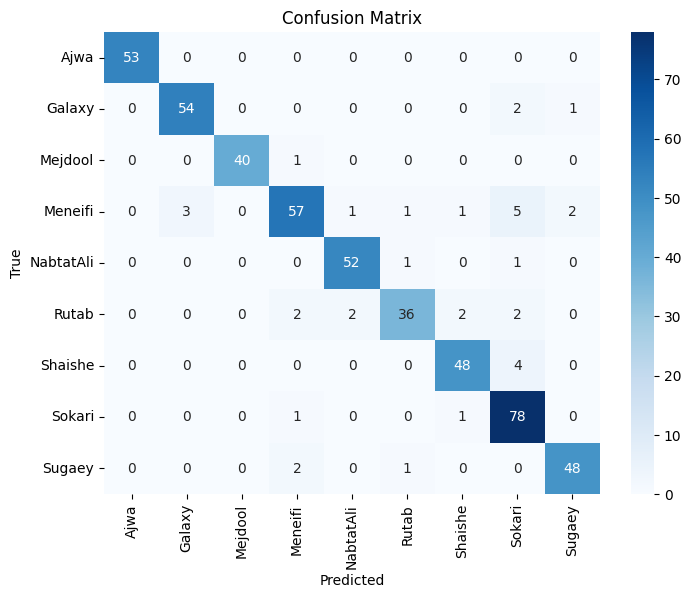

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

